# 9기 2주차 과제

## 1. y=10+9X+e에 해당하는 자료(산점도) 구성하기.

Text(0, 0.5, 'y')

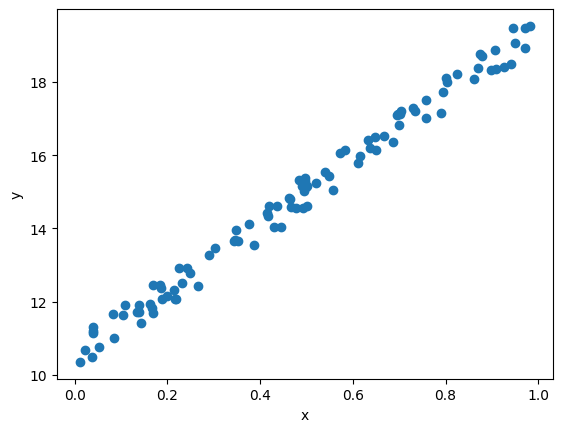

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#난수생성 시드 9
np. random.seed(9)

#직선식 작성 y=10+9X+e

x= np.random.rand(100,1)
e = np.random.rand(100,1)
y = 10 + 9*x + e

#산점도 그리기

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

## 사이킷런 LinearRegression을 이용해 캘리포니아 중간주택가격 예측('MedHouseVal'='Median House Value')
#### **보스턴데이터는 주택가격 데이터셋이 1.2버전부터 제거되어 캘리포니아로 대체

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
%matplotlib inline

# california 데이타셋 로드
housing = fetch_openml(name="house_prices", as_frame=True)

# california 데이타셋 DataFrame 변환
california = fetch_california_housing(as_frame=True)
californiaDF = california['frame']
californiaDF.head()

/Users/seungwoo/miniconda3/envs/tf25/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 산점도를 통해 회귀직선 표현

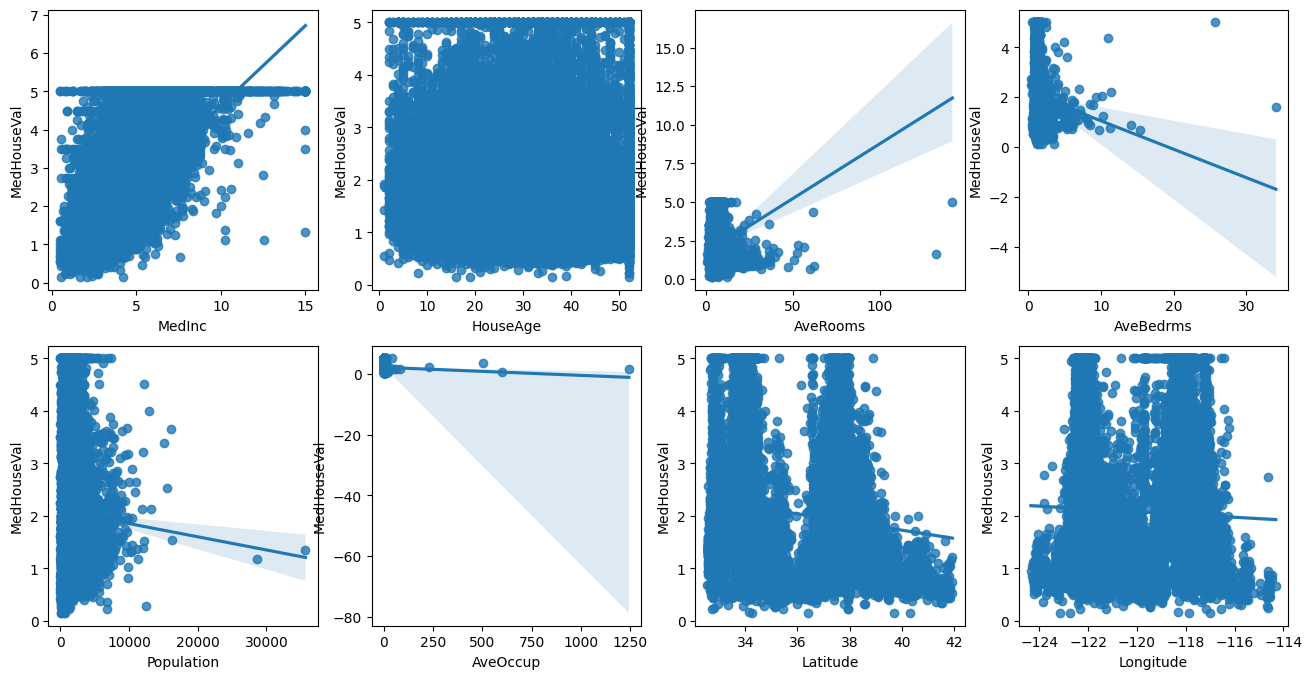

In [4]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)

#각 피처들을 입력해주세요
lm_features = ['MedInc','HouseAge','AveRooms', 'AveBedrms','Population', 'AveOccup',
               'Latitude', 'Longitude']

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현. 빈칸을 채워주세요
    sns.regplot(x=feature, y= 'MedHouseVal', data=californiaDF, ax=axs[row][col])



## 2. y에는 'MedHouseVal', X에는 'MedHouseVal'를 제외한 나머지 피처를 이용하여 다중회귀 모델 만들기

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
#y_target은 'MedHouseVal', X_data은 'MedHouseVal'이외 칼럼들로 설정
y = californiaDF['MedHouseVal']
X = californiaDF.drop(['MedHouseVal'], axis=1, inplace=False)

#데이터 분할 테스트사이즈는 0.3으로 (난수는 자유)
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Linear Regression OLS로 학습/예측/평가 수행.
model = LinearRegression()
model.fit(X,y)

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

#MSE값 출력
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 0.524 , RMSE : 0.724
Variance score : 0.601


In [18]:
print('절편 값:',model.intercept_)
print('회귀 계수값:', np.round(model.coef_, 1))

절편 값: -36.941920207184246
회귀 계수값: [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


In [19]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(model.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

AveBedrms     0.6
MedInc        0.4
HouseAge      0.0
Population   -0.0
AveOccup     -0.0
AveRooms     -0.1
Latitude     -0.4
Longitude    -0.4
dtype: float64

In [22]:
#절대값으로도 비교
coeff.abs().sort_values(ascending=False)

AveBedrms     0.6
MedInc        0.4
Latitude      0.4
Longitude     0.4
AveRooms      0.1
HouseAge      0.0
Population    0.0
AveOccup      0.0
dtype: float64

In [23]:
from sklearn.model_selection import cross_val_score

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-0.48 -0.62 -0.65 -0.54 -0.49]
 5 folds 의 개별 RMSE scores :  [0.7  0.79 0.8  0.74 0.7 ]
 5 folds 의 평균 RMSE : 0.746 


## 3. 릿지회귀

In [24]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#릿지회귀 모형 생성. alpha=10
ridge = Ridge(alpha=10)
#교차검증 cv=5로
neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)


print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.484 -0.623 -0.646 -0.544 -0.494]
 5 folds 의 개별 RMSE scores :  [0.695 0.789 0.804 0.737 0.703]
 5 folds 의 평균 RMSE : 0.746 


In [25]:
# Ridge의  alpha가 0, 0.1, 1, 10, 100일떄 평균 rmse 구하기
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산. 5-fold는 교차검정을 하기위해 5개의 부분으로 분할
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 0.746 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.746 
alpha 1 일 때 5 folds 의 평균 RMSE : 0.746 
alpha 10 일 때 5 folds 의 평균 RMSE : 0.746 
alpha 100 일 때 5 folds 의 평균 RMSE : 0.746 


### alpha별로 평균RMSE가 0.746이 나오는게 맞습니다.
### 모든 데이터셋에 대해 alpha값이 변화한다고 항상 성능지표가 변하는 것이 아니기때문입니다. 즉 성능지표에 alpha가 큰 영향을 주지 않았습니다.
### 또한 산점도를 통해 확인했을때 데이터셋의 스케일링이 적절하지 않음을 확인할 수 있으므로 이는 3주차 회귀 진단에서 다루겠습니다.

## 4. MAE가 아닌 RMSE를 사용하는 이유는 무엇인가요?

MAE는 실제 값과 예측값의 차이를 절댓값으로 변환해 평균낸 것입니다. MAE는 다른 지표들에 비해 직관적이라는 특징을 가지고 있는데, 이러한 장점을 가진 MAE가 아닌 RMSE를 사용하는 이유는 무엇인지 설명해주세요.

● 참고자료: https://data101.oopy.io/mae-vs-rmse

> RMSE는 "큰 오류값 차이에 대해서 크게 패널티를 주는" 이점이 있기 때문입니다.

> 머신러닝의 '학습'에 있어서는 이러한 특이값에 휘둘리지 않는 게 굉장히 중요한 덕목입니다.

> RMSE는 MAE에 비해 직관성은 떨어지지만, 로버스트한 성격(=극단적이지 않은)에서 강점을 보인다고 정리할 수 있습니다.

## 5.편향-분산 트레이드 오프에 대해서 자세히 설명후 해결방안을 찾아주세요

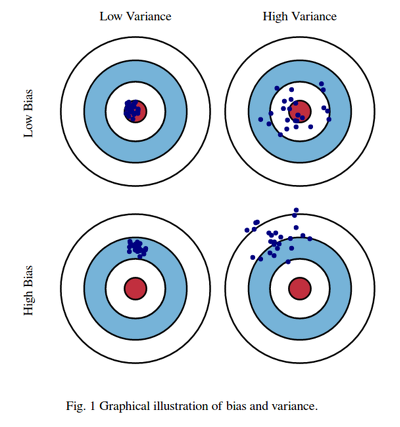
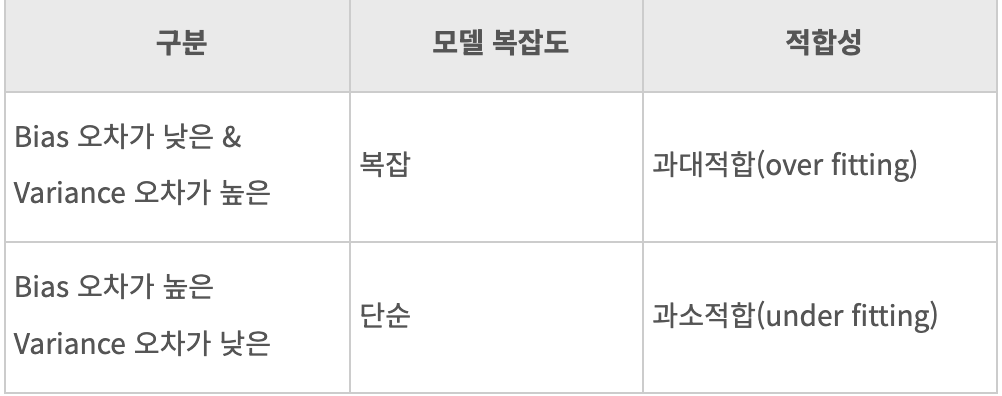

> bias 에러가 높아지는 것은 모델이 단순해 정확한 예측을 하지 못하는 경우를 말하고, 

> variance에러는 노이즈까지 학습하여 모델이 너무 복잡해 약간의 input에도 예측 Y값이 크게 흔들리는 것을 말한다. 

##### 이 두가지 에러가 상호 Trade-off 관계에 있어 이 둘을 모두 잡는 것은 불가능한 딜레마가 생긴다.

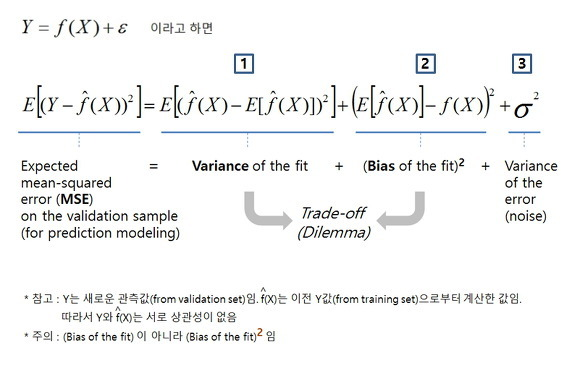

> MSE는 1번, 2번, 3번의 합으로 1번과 2번은 reducible error라고하고 이는 학습을 통해 줄일 수 있는 영역이다. 반면 3번은 본질적인 한계치로 irreducible error라 하며 어찌할 수 없는 오차다.

> 수식을 보면 1번과 2번의 E[f(hat(X))]의 부호가 반대로 들어가 있어, trade-off 관계에 빠질 수 밖에 없다.

> 결론적으로 MSE는 계속 학습 시킨다고 해서 전체 error가 줄어드는 것은 아니다. 따라서 bias와 variance를 고려해 가장 낮은 지점을 찾아 최적의 모델을 만들어야한다.

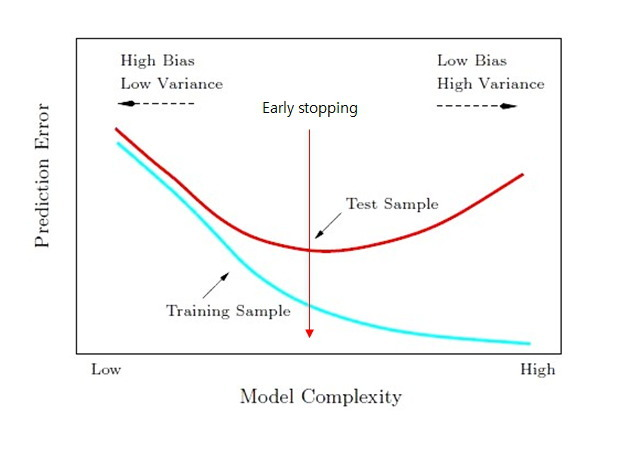

> 빨간 선은 test sample로 이를 validation sample로 이해하면 된다. 이를 비교하면 초반 error는 떨어지나 시간이 지날수록 error가 증가하는 것을 보인다.

> 따라서 training을 지속하기보다 test sample의 에러가 증가하는 시점에 학습을 중단하는 것이 좋다. 

> validation set이 최적의 error율을 보인다면 그 지점이 가장 학습이 잘 된 지점으로 생각하고 학습을 중단시키면 된다. 그리고 Test set으로 실제 모델의 평가를 하면된다.